In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS/PPO/feats/ppo_env4_feats10v7/PPO_continuous-grid_d1217_00000_0_2022-04-11_13-26-15/"
log_df= pd.read_csv(EXPERIMENT_DIR + "/progress.csv")
#log_df = log_df.loc[list(range(0,len(log_df),10))]
log_df = log_df.loc[list(range(0,400,10))]
log_df["reward_sum"] = log_df.loc[:, ["episode_reward_min","episode_reward_mean", "episode_reward_max"]].sum(axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS/PPO/feats/ppo_env4_feats10v7/PPO_continuous-grid_d1217_00000_0_2022-04-11_13-26-15//progress.csv'

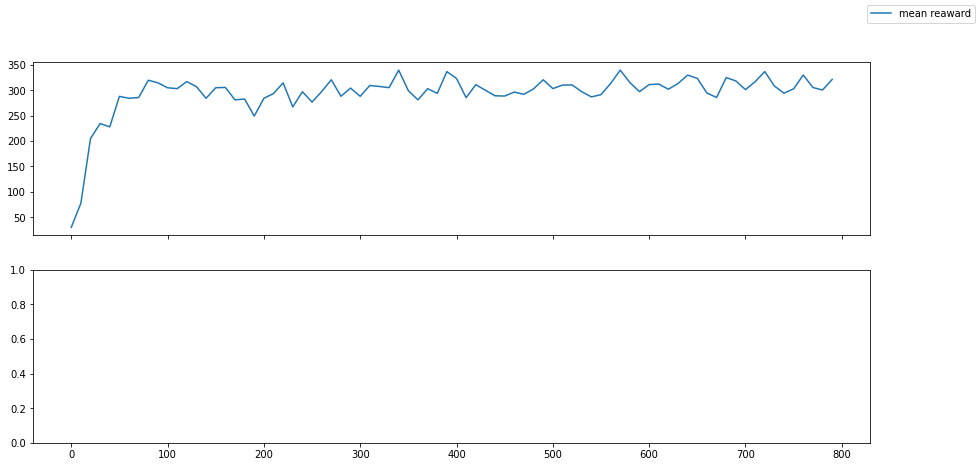

In [14]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    if "checkpoint-" in fName and "_test.csv" in fName:
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            continue
        checkpoint_number = int(re.search("\d+", fName).group())
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        #axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()

774

In [9]:
#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env4/PPO/feats2v2_train/ppo_env4feats2v2_train5v2/PPO_continuous-grid_f1709_00000_0_2022-05-31_15-26-49/"
#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS/PPO/feats/ppo_env4feats9v3_train5v2/PPO_continuous-grid_f1709_00001_1_2022-05-31_15-27-05/"
#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS/PPO/env4feats10v7_train/ppo_env4feats10v7_train5v2/PPO_continuous-grid_f1709_00002_2_2022-05-31_15-27-22/"
EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env4/PPO/env4feats12_train/ppo_env4feats12_train5v6/PPO_continuous-grid_448ca_00002_2_2022-06-14_16-10-32/"
#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env4/PPO/env4feats12_train/ppo_env4feats12_train5v2/PPO_continuous-grid_448ca_00001_1_2022-06-14_16-10-15/"

#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env4v2/PPO/env4v2feats10v7_train/ppo_env4v2feats10v7_train5v2/PPO_continuous-grid_f2066_00002_2_2022-05-31_15-27-23/"
#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env4v2/PPO/feats2v2_train/ppo_env4v2feats2v2_train5v2/PPO_continuous-grid_f2066_00000_0_2022-05-31_15-26-50/"
#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env4v2/PPO/feats2v2_train/ppo_env4v2feats9v3_train5v2/PPO_continuous-grid_f2066_00001_1_2022-05-31_15-27-07/"

#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env7/PPO/feats10v7_train/ppo_env7feats10v7_train5v2/PPO_continuous-grid_dd8f1_00002_2_2022-05-31_15-26-54/"
#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env7/PPO/feats2v2_train/ppo_env7feats2v2_train5v2/PPO_continuous-grid_dd8f1_00000_0_2022-05-31_15-26-15/"
#EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env7/PPO/feats2v2_train/ppo_env7feats9v3_train5v2/PPO_continuous-grid_dd8f1_00001_1_2022-05-31_15-26-34/"


log_df= pd.read_csv(EXPERIMENT_DIR + "/progress.csv")
log_df = log_df.loc[list(range(0,log_df.index[-1]+1,10))]
log_df["reward_sum"] = log_df.loc[:, ["episode_reward_min","episode_reward_mean", "episode_reward_max"]].sum(axis=1)

470 91
330 92
450 93
700 93
610 89
360 91
340 93
540 90
730 92
550 88
530 91
770 92
520 90
370 90
690 92
660 91
750 94
480 91
680 90
590 90
670 91
650 93
420 42
780 93
560 89
640 90
510 90
430 92
500 92
570 86
630 91
620 90
800 93
390 90
310 92
350 91
320 90
440 91
400 91
460 91
720 91
410 91
710 91
760 91
600 87
380 92
740 91
490 88
790 94
580 89


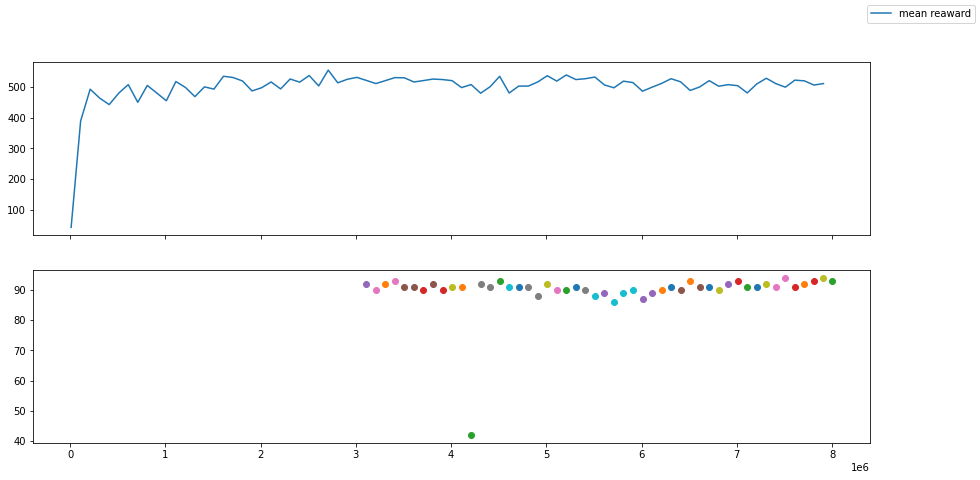

In [10]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    if "checkpoint-" in fName and "_test.csv" in fName:
    #if "checkpoint-" in fName and "_test_old.csv" in fName:
    #if "checkpoint-" in fName and "_test_env4_2.csv" in fName:        
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            #continue
        checkpoint_number = int(re.search("\d+", fName).group())
        #success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        if checkpoint_number==800:
            axes[1].scatter(800*10000, success_rate)
        else:
            axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        #axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()

470 83
330 69
450 82
700 81
610 79
360 76
340 70
540 86
730 81
550 82
530 82
770 73
520 83
370 77
690 83
660 73
750 79
480 85
680 79
590 78
670 79
650 80
420 82
780 78
560 85
640 79
510 85
430 80
500 84
570 85
630 77
620 79
800 73
390 72
310 80
350 71
320 75
440 83
400 81
460 82
720 79
410 80
710 82
760 80
600 79
380 78
740 80
490 82
790 74
580 85


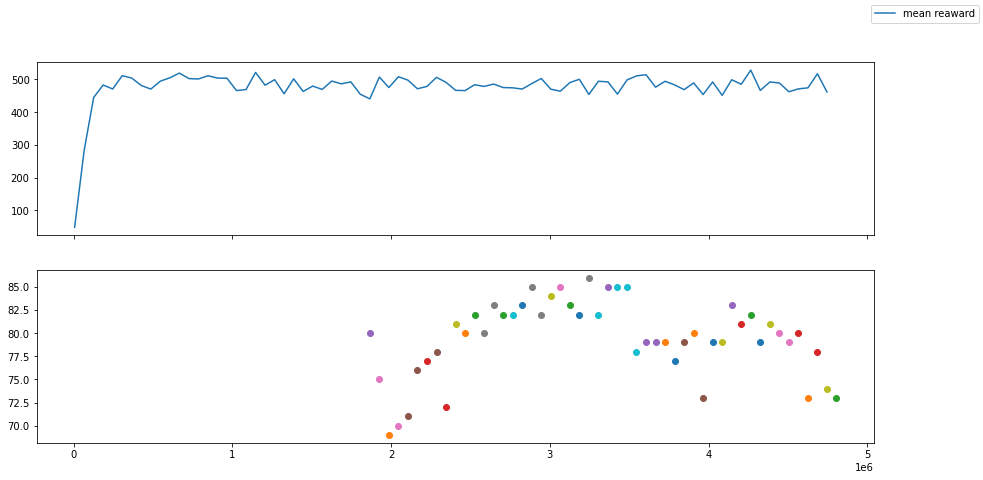

In [72]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    if "checkpoint-" in fName and "_test.csv" in fName:
    #if "checkpoint-" in fName and "_test_old.csv" in fName:
    #if "checkpoint-" in fName and "_test_env4_2.csv" in fName:        
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            #continue
        checkpoint_number = int(re.search("\d+", fName).group())
        #success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        if checkpoint_number==800:
            axes[1].scatter(800*6000, success_rate)
        else:
            axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        #axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()

470 61
450 59
700 60
610 55
540 61
730 59
550 59
530 59
770 56
520 57
690 56
660 60
750 58
480 59
680 57
590 61
670 56
650 59
420 61
780 58
560 62
640 62
510 61
430 57
500 58
570 61
630 57
620 58
800 58
440 61
460 60
720 60
410 60
760 60
600 60
740 61
490 58
790 59
580 56


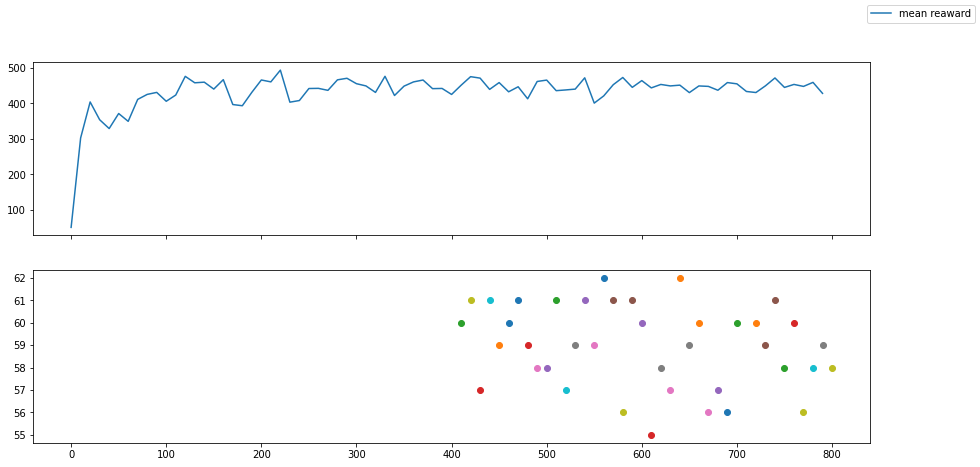

In [35]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    if "checkpoint-" in fName and "_test.csv" in fName:
    #if "checkpoint-" in fName and "_test_old.csv" in fName:
    #if "checkpoint-" in fName and "_test_env4_2.csv" in fName:
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            continue
        checkpoint_number = int(re.search("\d+", fName).group())
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        #axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()

NameError: name 'log_df' is not defined

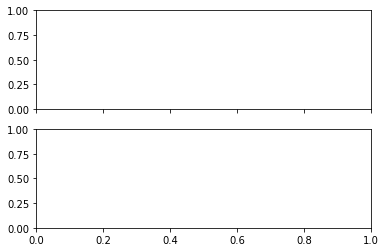

In [3]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    if "checkpoint-" in fName and "_test.csv" in fName:
    #if "checkpoint-" in fName and "_test_old.csv" in fName:
    #if "checkpoint-" in fName and "_test_env4_2.csv" in fName:
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            continue
        checkpoint_number = int(re.search("\d+", fName).group())
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        #axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()

In [33]:
EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env7/PPO/feats2v2_train/ppo_env7_feats2v2_train5v2/PPO_continuous-grid_84beb_00002_2_2022-05-27_19-18-13/"
log_df= pd.read_csv(EXPERIMENT_DIR + "/progress.csv")
log_df = log_df.loc[list(range(0,log_df.index[-1]+1,10))]
log_df["reward_sum"] = log_df.loc[:, ["episode_reward_min","episode_reward_mean", "episode_reward_max"]].sum(axis=1)

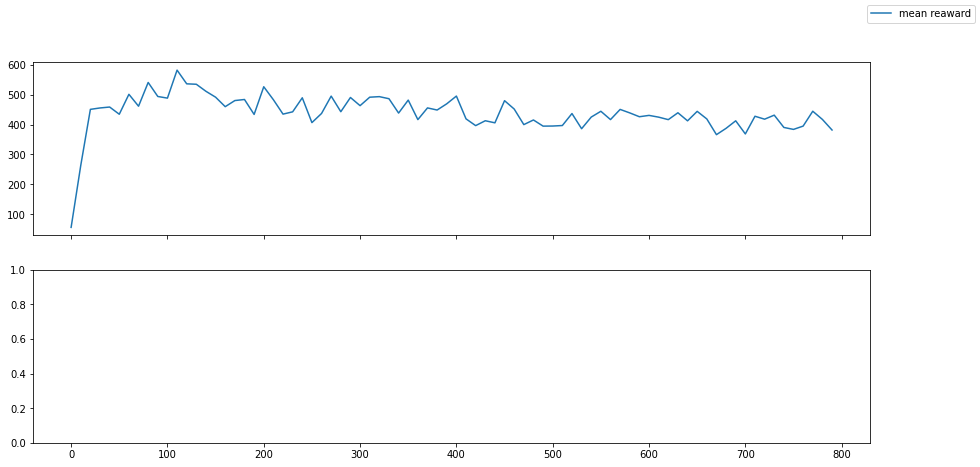

In [28]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    #if "checkpoint-" in fName and "_test.csv" in fName:
    #if "checkpoint-" in fName and "_test_old.csv" in fName:
    if "checkpoint-" in fName and "_test_env4.csv" in fName:
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            continue
        checkpoint_number = int(re.search("\d+", fName).group())
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        #axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()

In [7]:
EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env7/PPO/ppo_env7/PPO_continuous-grid_43e23_00000_0_2022-05-19_12-44-24/"
log_df= pd.read_csv(EXPERIMENT_DIR + "/progress.csv")
log_df = log_df.loc[list(range(0,log_df.index[-1]+1,10))]
log_df["reward_sum"] = log_df.loc[:, ["episode_reward_min","episode_reward_mean", "episode_reward_max"]].sum(axis=1)

4 success checkpoint-700_test_env4.csv
700 53
4 success checkpoint-620_test_env4.csv
620 60
4 success checkpoint-720_test_env4.csv
720 50
4 success checkpoint-750_test_env4.csv
750 55
4 success checkpoint-630_test_env4.csv
630 55
4 success checkpoint-650_test_env4.csv
650 61


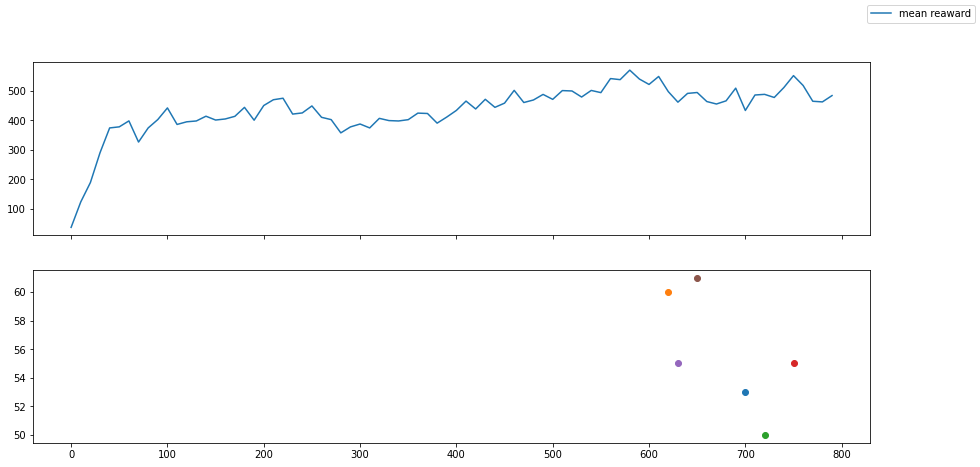

In [8]:
fig, axes  = plt.subplots(2,1, sharex=True)
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_max"], label="max reward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df["timesteps_total"], log_df["reward_sum"], label="summ reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_max"], label="max reward")
axes[0].plot(log_df.index, log_df["episode_reward_mean"], label="mean reaward")
#axes[0].plot(log_df.index, log_df["episode_reward_min"], label="min reaward")
#axes[0].plot(log_df.index, log_df["reward_sum"], label="summ reaward")

for fName in os.listdir(EXPERIMENT_DIR):
    #if "checkpoint-" in fName and "_test_old.csv" in fName:
    if "checkpoint-" in fName and "_test_env4.csv" in fName:
        test_df= pd.read_csv(EXPERIMENT_DIR + "/" + fName, sep=";")
        if len(test_df) <100:
            print(fName, "less then 100 seeds tested", len(test_df))
            continue
        checkpoint_number = int(re.search("\d+", fName).group())
        success_rate = test_df["mission_status"].isin(["success", "finished_by_time"]).sum()
        #axes[1].scatter(log_df.loc[checkpoint_number]["timesteps_total"], success_rate)
        if success_rate>3:
            print("4 success", fName)
        axes[1].scatter(checkpoint_number, success_rate)
        print(checkpoint_number, success_rate)

fig.set_size_inches(15,7)
fig.legend()
plt.show()